In [ ]:
# def furness(distcost, future_Origin, future_Destination, tolerance = 0.01):
#     normal_tolerance = 99999
#     dist_size = distcost.shape[0]
#     dist_name = [f'zone {i}' for i in range(1, dist_size+1)]

#     origin_data = pd.DataFrame(
#         distcost, index = dist_name, columns = dist_name
#     )

#     origin_data['O'] = origin_data.sum(axis=1)
#     origin_data.loc['D'] = origin_data.sum(axis=0)
#     error_list = []

#     while normal_tolerance > tolerance:
#         curr_row_nums = np.sum(distcost,axis=1)
#         relations_currrow = future_Origin/ curr_row_nums
#         curr_rows_matrix = distcost * relations_currrow[:, np.newaxis]

#         curr_col_nums = np.sum(distcost,axis=0)
#         relations_col = future_Destination / curr_col_nums
#         final_matrix = curr_rows_matrix * relations_col

#         final_matrix_col = np.sum(final_matrix, axis=0)
#         final_matrix_row = np.sum(final_matrix, axis=1)
#         error = np.sum(abs(final_matrix_col - future_Destination)) + np.sum(abs(final_matrix_row - future_Origin))
#         normal_tolerance = error/ np.sum(future_Origin)

#         error_list.append(normal_tolerance)
    
#     final_matrix_size = final_matrix.shape[0]
#     final_matrix_name = [f'zone {i}' for i in range(1, final_matrix_size + 1)]

#     final_matrix_df = pd.DataFrame(final_matrix,index = final_matrix_name,columns=final_matrix_name)
#     final_matrix_df['Total O'] = final_matrix_df.sum(axis=1)
#     final_matrix_df.loc['Total D'] = final_matrix_df.sum()

#     print(distcost)
#     print(final_matrix_df)
#     return final_matrix_df.round(3)

def furness(distcost, future_Origin, future_Destination, tolerance=0.01):
    normal_tolerance = 99999
    error_list = []

    # 保留干净的 distcost
    curr_matrix = distcost.copy()

    while normal_tolerance > tolerance:
        # 行约束
        curr_row_sums = np.sum(curr_matrix, axis=1)
        row_factors = future_Origin / curr_row_sums
        curr_matrix = curr_matrix * row_factors[:, np.newaxis]

        # 列约束
        curr_col_sums = np.sum(curr_matrix, axis=0)
        col_factors = future_Destination / curr_col_sums
        curr_matrix = curr_matrix * col_factors

        # 计算误差
        final_matrix_row = np.sum(curr_matrix, axis=1)
        final_matrix_col = np.sum(curr_matrix, axis=0)
        error = np.sum(abs(final_matrix_row - future_Origin)) + np.sum(abs(final_matrix_col - future_Destination))
        normal_tolerance = error / np.sum(future_Origin)

        error_list.append(normal_tolerance)

    # 输出结果 DataFrame
    dist_size = curr_matrix.shape[0]
    names = [f'zone {i}' for i in range(1, dist_size + 1)]
    final_matrix_df = pd.DataFrame(curr_matrix, index=names, columns=names)
    final_matrix_df['Total O'] = final_matrix_df.sum(axis=1)
    final_matrix_df.loc['Total D'] = final_matrix_df.sum()

    return final_matrix_df.round(3)


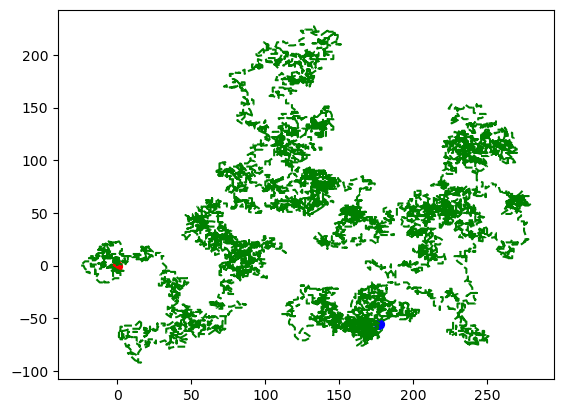

In [29]:
from random import choice
import matplotlib.pyplot as plt

class randomwalk:
    def __init__(self,num = 10000):
        self.num = num
        self.x_pos = [0]
        self.y_pos = [0]
    
    def steps(self):
        distance = choice([0,1,2,3,4])
        direction = choice([-1,0,1])
        step = distance * direction
        return step
    
    def walk(self):
        while len(self.x_pos) < self.num:
            x_position = self.steps()
            y_position = self.steps()
        
            x = self.x_pos[-1] + x_position
            y = self.y_pos[-1] + y_position

            self.x_pos.append(x)
            self.y_pos.append(y)

    def get_info(self):
        self.x_posini = self.x_pos[0]
        self.y_posini = self.y_pos[0]
        self.x_posend = self.x_pos[-1]
        self.y_posend = self.y_pos[-1]
        self.x_min = min(self.x_pos)
        self.y_min = min(self.y_pos)
        self.x_max = max(self.x_pos)
        self.y_max = max(self.y_pos)
        return self.x_posini, self.y_posini, self.x_posend, self.y_posend, self.x_min, self.y_min, self.x_max, self.y_max

a = randomwalk()
a.walk()
a.get_info()

plt.plot(a.x_pos,a.y_pos,linestyle='--',color='g')
plt.scatter(a.x_posini,a.x_posini,marker='o',s=50,color='r')
plt.scatter(a.x_posend,a.y_posend,marker='o',s=50,color='b')
plt.show()

In [1]:
import numpy as np
import pandas as pd


In [2]:
def furness(origin_matrix, future_sum_o, future_sum_d, tolerance=0.01):
    update_tolerance = 9999
    error_list = []

    curr_matrix = origin_matrix
    
    while update_tolerance > tolerance:
        curr_row_sum = np.sum(curr_matrix,axis=1)
        row_factor = future_sum_o / curr_row_sum
        scaled_matrix = row_factor *  curr_matrix[:,np.newaxis]

        